In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [0]:
!rm -Rf cognitive_science3
!git clone https://github.com/terne/cognitive_science3

Cloning into 'cognitive_science3'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 100 (delta 13), reused 0 (delta 0), pack-reused 69
Receiving objects: 100% (100/100), 187.43 KiB | 14.42 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [0]:
# funcntion for replacing the error numbers with a mean of the rest (not errored) numbers
def replace_errors(data_sheet):
  errors = [i for i in data_sheet["Fixation Duration on Emotional_raw"] if len(str(i))>=10] # specifing an error as any large number
  not_errors = [i for i in data_sheet["Fixation Duration on Emotional_raw"] if i not in errors]
  mean_duration = np.round(np.mean(not_errors))
  means = [mean_duration]*len(errors)
  # To use the replace function with a list of several different numbers to replace, then the number of values must match the length of that list. 
  # Thats why the mean(list) is multiplied by the number of errors.
  data_sheet["Fixation Duration on Emotional_raw"] = data_sheet["Fixation Duration on Emotional_raw"].replace(to_replace=errors, value=means)
  return data_sheet


In [0]:
def fixation_data(participant, emotion_string):
  #get relevant information from this participant
  p_data = participant[['First Fixation_raw','Fixation Frequency on Emotional_raw', 'Fixation Duration on Emotional_raw', 'Left Image_raw', 'Right Image_raw']]

  #Now I will try to filter the through the columns to get the rows containing the given emotion stimuli
  in_left = p_data['Left Image_raw'].str.contains(emotion_string) == True
  in_right = p_data['Right Image_raw'].str.contains(emotion_string) == True

  p_data = p_data[in_left | in_right]


  #Now we can do the same thing to see how many times they fixated on the SA face by filtering for 'emotional' and removing 'neutral'
  p_emo = p_data['First Fixation_raw'].str.contains("Emotional") == True
  
  initial_fixation = len(p_data[p_emo])
  p_emo_time = p_data[p_emo]
  
  #disengagement_data = p_data['Disengagement Time_raw'].str.contains("Emotional") == True
  
 
  #Now we can find the participants average of time spent on SA stimuli 
  fixation_time = p_emo_time['Fixation Duration on Emotional_raw'].mean()
  
  # get the frequncy counts:
  frequencies = p_data[p_emo]["Fixation Frequency on Emotional_raw"]
  # sum them
  sum_of_freq_counts = sum(frequencies)
  # get the mean
  mean_freq_count = frequencies.mean() # this is only the mean count compared to the total number of fixations on this emotion (not of both emotions)
  
  return [fixation_time, initial_fixation, sum_of_freq_counts, mean_freq_count]

In [0]:
# looping and making some datafraaames!

participants = ["F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10", "F11", "F12", "F13", "F14", "F15", "F16",
                "M1", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9", "M10", "M11", "M12", "M13", "M14", "M15", "M16"]

got_sad_prime = ["F1", "F3", "F8", "F9", "F11", "F12", "F13", "F15", "M1", "M5", "M7", "M8", "M9", "M12", "M14", "M15"]


# making nicely looking dataframes, one for each emotion, then adding them together in the end to make one common dataframe.
sad_data = {}
happy_data = {}
prime_list = []
for participant in participants:
  if participant in got_sad_prime:
    prime_list.append("sad")
  else:
    prime_list.append("neutral")
  data = pd.read_excel("cognitive_science3/data.csv.xlsx", sheet_name=participant)
  # adding in the replacement process here
  data_processed = replace_errors(data)
  sad_data[participant] = fixation_data(data_processed, "SA")
  happy_data[participant] = fixation_data(data_processed, "HA")

df_sad = pd.DataFrame.from_dict(sad_data, orient='index')
df_happy = pd.DataFrame.from_dict(happy_data, orient='index')

df_sad.columns=['fixation_time_sad', 'initial_fixation_count_sad', 'sum_of_freq_counts_sad', 'mean_freq_count_sad']
df_happy.columns=['fixation_time_happy', 'initial_fixation_count_happy', 'sum_of_freq_counts_happy', 'mean_freq_count_happy']

df_sad['ID']=df_sad.index
df_sad = df_sad.reset_index(drop=True)
 
#df_happy['ID']=df_happy.index
df_happy = df_happy.reset_index(drop=True)

all_data = pd.concat([df_sad, df_happy], axis=1)


all_data["movie_prime"] = pd.Series(prime_list)

stats_data = all_data.copy()

# missing values: disengagement stuff (mean time from sad, from happy?...)


Data looksy:)

In [0]:
stats_data


,fixation_time_sad,initial_fixation_count_sad,sum_of_freq_counts_sad,mean_freq_count_sad,ID,fixation_time_happy,initial_fixation_count_happy,sum_of_freq_counts_happy,mean_freq_count_happy,movie_prime
0,1507.466667,15,28,1.866667,F1,1530.680000,25,55,2.200000,sad
1,1195.117647,17,41,2.411765,F2,1369.631579,19,44,2.315789,neutral
2,1612.055556,18,44,2.444444,F3,1590.444444,18,47,2.611111,sad
3,1327.055556,18,47,2.611111,F4,1534.636364,22,61,2.772727,neutral
4,1445.421053,19,40,2.105263,F5,1288.285714,14,28,2.000000,neutral
5,1392.555556,18,47,2.611111,F6,1330.277778,18,50,2.777778,neutral
6,1349.923077,13,33,2.538462,F7,1518.111111,18,40,2.222222,neutral
7,1064.250000,16,51,3.187500,F8,1078.052632,19,77,4.052632,sad
8,1404.650000,20,51,2.550000,F9,1460.333333,21,53,2.523810,sad
9,1144.388889,18,44,2.444444,F10,1205.318182,22,58,2.636364,neutral


In [0]:
#example of getting people with neutral prime
neutral_primed = stats_data[stats_data["movie_prime"]=="neutral"]

print("Initial orientation")

print(neutral_primed["initial_fixation_count_happy"].mean())
print(np.std(neutral_primed["initial_fixation_count_happy"]))

print(neutral_primed["initial_fixation_count_sad"].mean())
print(np.std(neutral_primed["initial_fixation_count_sad"]))

print("Gaze frequency")

print(neutral_primed["sum_of_freq_counts_happy"].mean())
print(np.std(neutral_primed["sum_of_freq_counts_happy"]))

print(neutral_primed["sum_of_freq_counts_sad"].mean())
print(np.std(neutral_primed["sum_of_freq_counts_sad"]))

print("gaze duration")

print(neutral_primed["fixation_time_happy"].mean())
print(np.std(neutral_primed["fixation_time_happy"]))

print(neutral_primed["fixation_time_sad"].mean())
print(np.std(neutral_primed["fixation_time_sad"]))

Initial orientation
18.875
2.7128168017763383
16.625
1.899835519196333
Gaze frequency
48.875
12.98015311928176
41.9375
11.502547272234963
gaze duration
1346.510052791743
162.93833843500144
1320.770810120607
173.7588013396205


In [0]:
#example of getting people with sad prime
sad_primed = stats_data[stats_data["movie_prime"]=="sad"]

print("Initial orientation")

print(sad_primed["initial_fixation_count_happy"].mean())
print(np.std(sad_primed["initial_fixation_count_happy"]))

print(sad_primed["initial_fixation_count_sad"].mean())
print(np.std(sad_primed["initial_fixation_count_sad"]))

print("Gaze frequency")

print(sad_primed["sum_of_freq_counts_happy"].mean())
print(np.std(sad_primed["sum_of_freq_counts_happy"]))

print(sad_primed["sum_of_freq_counts_sad"].mean())
print(np.std(sad_primed["sum_of_freq_counts_sad"]))

print("gaze duration")

print(sad_primed["fixation_time_happy"].mean())
print(np.std(sad_primed["fixation_time_happy"]))

print(sad_primed["fixation_time_sad"].mean())
print(np.std(sad_primed["fixation_time_sad"]))


Initial orientation
19.25
2.9895651857753496
17.6875
3.3674684482560484
Gaze frequency
49.75
16.033168744823964
45.75
14.788086421170252
gaze duration
1387.37572186929
275.6160894230395
1346.5813276397516
303.1308419669927


In [0]:

sad_prime_disHA = [398.16,
376.09,
937.99,
217.87,
267.98,
389.12,
593.81,
386.74,
299.11,
259.78,
675.28,
654.37,
388.88,
478.34,
228.69,
657.79]

sad_prime_disSA = [456.13,
431.38,
345.21,
222.14,
301.93,
286.27,
414.9,
352.21,
264.55,
267.15,
461.83,
261.96,
324.79,
354.9,
269.49,
1453.25]


neutral_prime_disHA = [270.93,
178.89,
336.32,
288.03,
290.41,
1319.33,
540.12,
423.99,
237.83,
245.62,
245.9,
308.46,
281.23,
538.53,
1545.51,
344.74]

neutral_prime_disSA = [307.26,
257,
258.68,
315.14,
320.16,
527.28,
377.11,
391.29,
230.61,
840.76,
270.03,
278.6,
411.18,
308.98,
653.75,
423.88]


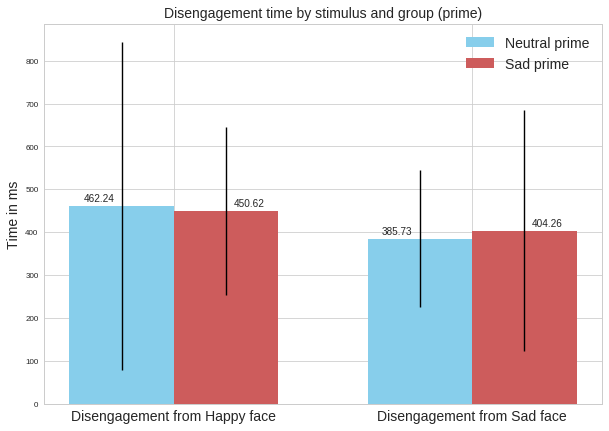

In [0]:


import seaborn as sns

neutral_prime_mean, neutral_std = (np.round(np.mean(neutral_prime_disHA), decimals=2), np.round(np.mean(neutral_prime_disSA),decimals=2)), (np.std(neutral_prime_disHA), np.std(neutral_prime_disSA))
sad_prime_means, sad_std = (np.round(np.mean(sad_prime_disHA),decimals=2), np.round(np.mean(sad_prime_disSA),decimals=2)), (np.std(sad_prime_disHA), np.std(sad_prime_disSA))

ind = np.arange(len(neutral_prime_mean))  # the x locations for the groups
width = 0.35  # the width of the bars

#plt.style.use('seaborn-whitegrid')

plt.style.use("seaborn-colorblind")

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(ind - width/2, neutral_prime_mean, width, yerr=neutral_std,
                color='SkyBlue', label='Neutral prime')
rects2 = ax.bar(ind + width/2, sad_prime_means, width, yerr=sad_std,
                color='IndianRed', label='Sad prime')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time in ms', fontsize=14)
ax.set_title('Disengagement time by stimulus and group (prime)', fontsize=14)
ax.set_xticks(ind)
ax.set_xticklabels(('Disengagement from Happy face', 'Disengagement from Sad face'), fontsize=14)
ax.legend(fontsize=14)


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

plt.show()



In [0]:
print((np.round(np.mean(neutral_prime_disHA), decimals=2), np.round(np.mean(neutral_prime_disSA),decimals=2)), (np.std(neutral_prime_disHA), np.std(neutral_prime_disSA)))
print((np.round(np.mean(sad_prime_disHA),decimals=2), np.round(np.mean(sad_prime_disSA),decimals=2)), (np.std(sad_prime_disHA), np.std(sad_prime_disSA)))

(462.24, 385.73) (381.4732269930617, 158.92232769574693)
(450.62, 404.26) (195.2316613026688, 280.2312174341206)
